In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid', font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
diamond_data = pd.read_csv('diamonds.csv')

In [3]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamond_data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [5]:
diamond_data = diamond_data.drop(["Unnamed: 0"],axis=1)
diamond_data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75



Univariate and Bivariate Data Exploration



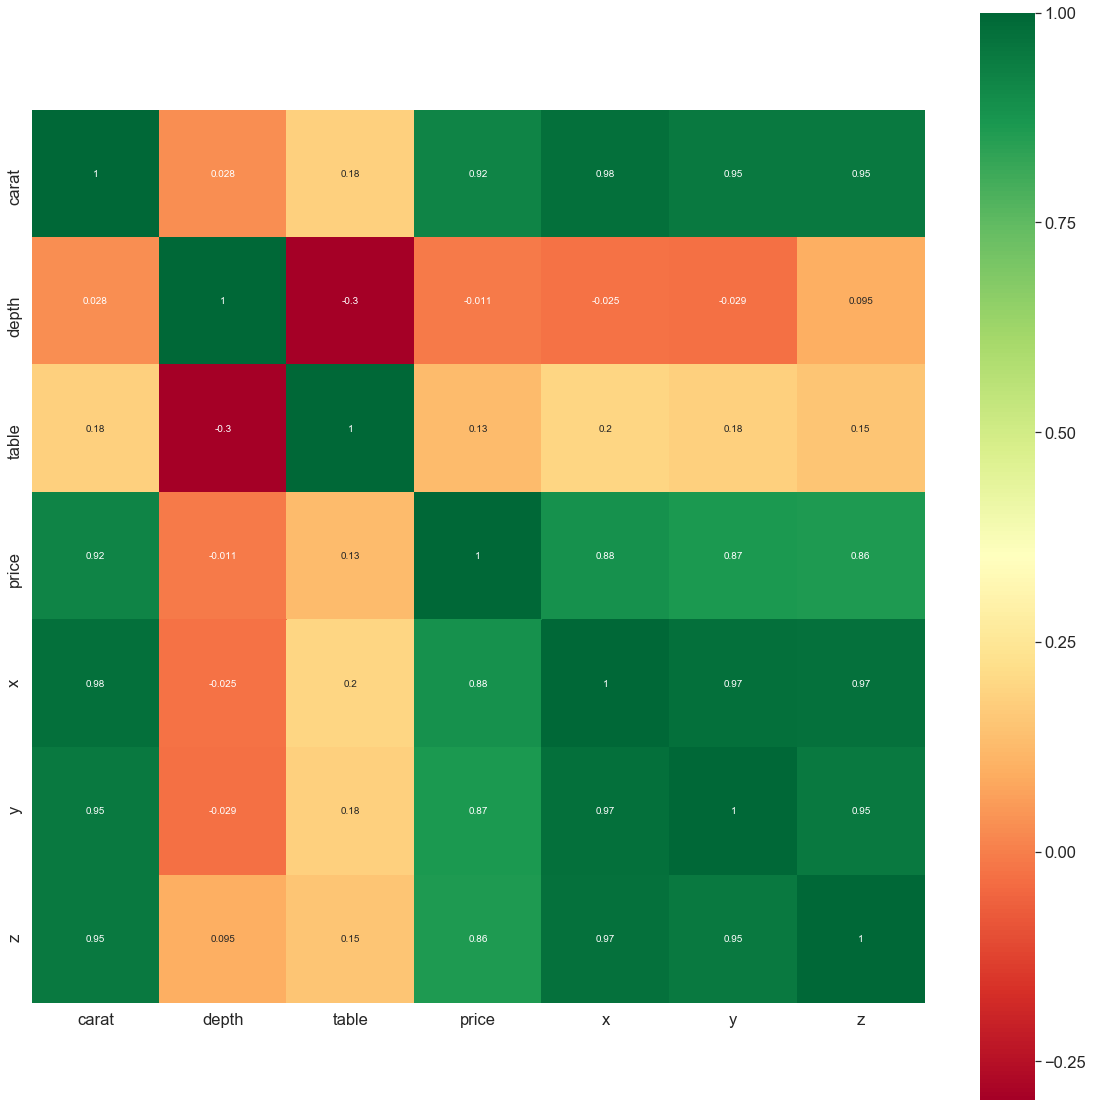

In [7]:
plt.figure(figsize=(20,20))
p=sns.heatmap(diamond_data.corr(), annot=True, cmap='RdYlGn', square=True)

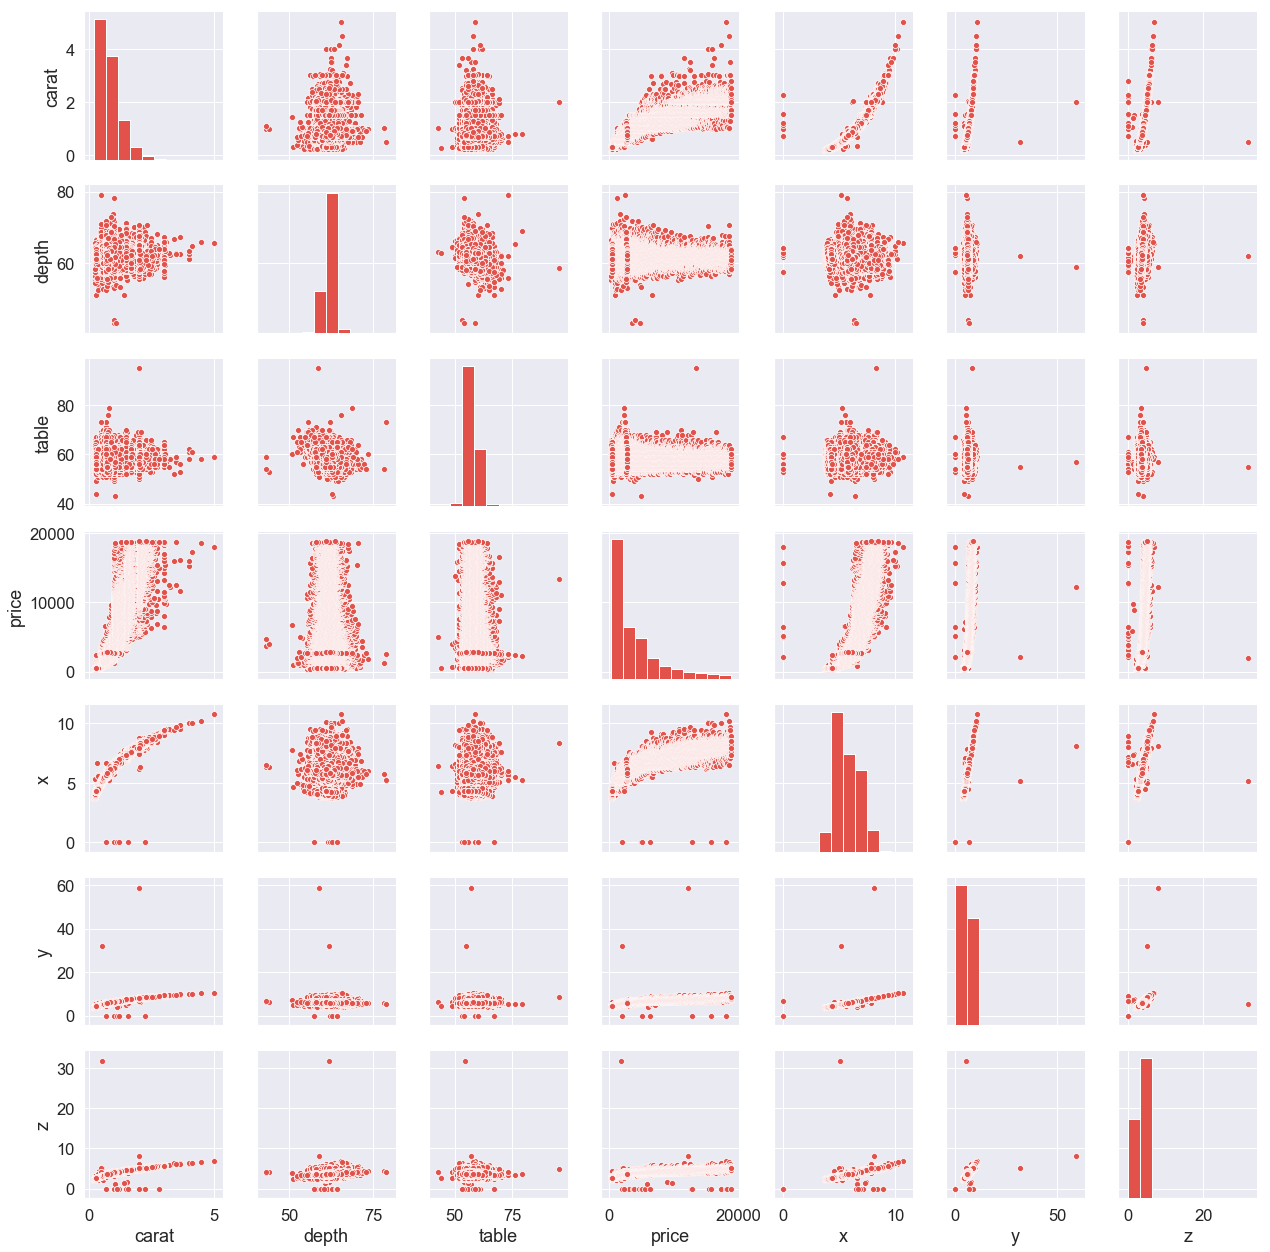

In [9]:
p=sns.pairplot(diamond_data)

In [11]:
diamond_data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [12]:
print("Number of rows with x == 0: {} ".format((diamond_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_data.depth==0).sum()))


Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [13]:
diamond_data[['x','y','z']] = diamond_data[['x','y','z']].replace(0,np.NaN)

In [14]:
diamond_data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [17]:
diamond_data.dropna(inplace=True)

In [18]:
diamond_data.shape

(53920, 10)

In [19]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

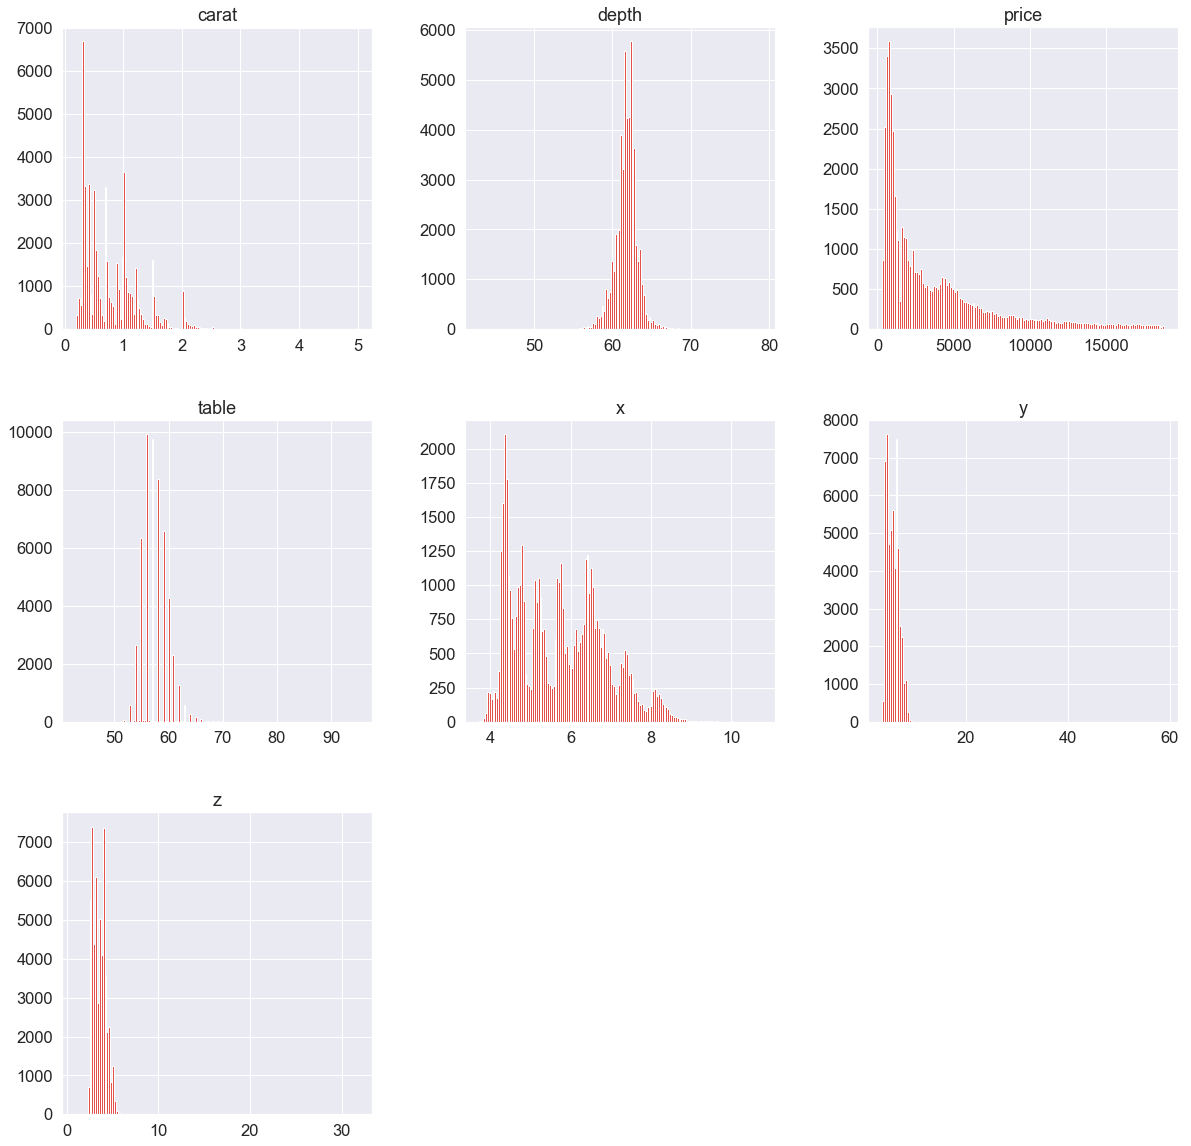

In [20]:
p = diamond_data.hist(figsize = (20,20), bins=150)

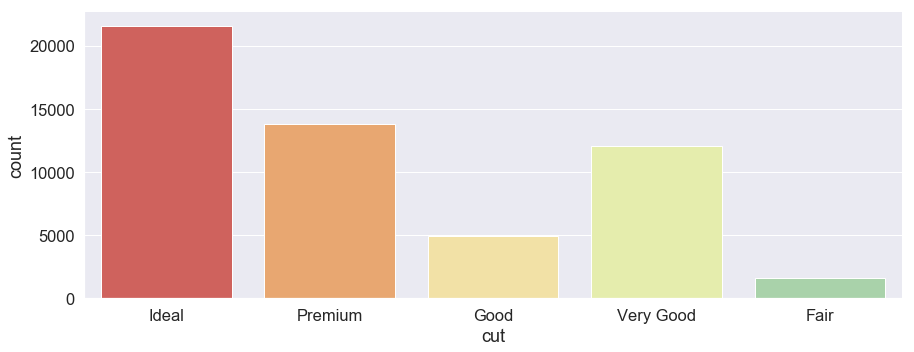

In [21]:
p = sns.factorplot(x='cut', data=diamond_data, kind='count',aspect=2.5)

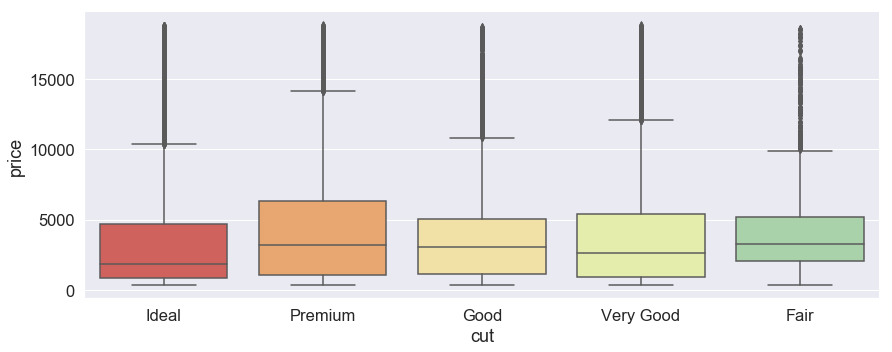

In [22]:
p = sns.factorplot(x='cut', y='price', data=diamond_data, kind='box', aspect=2.5)

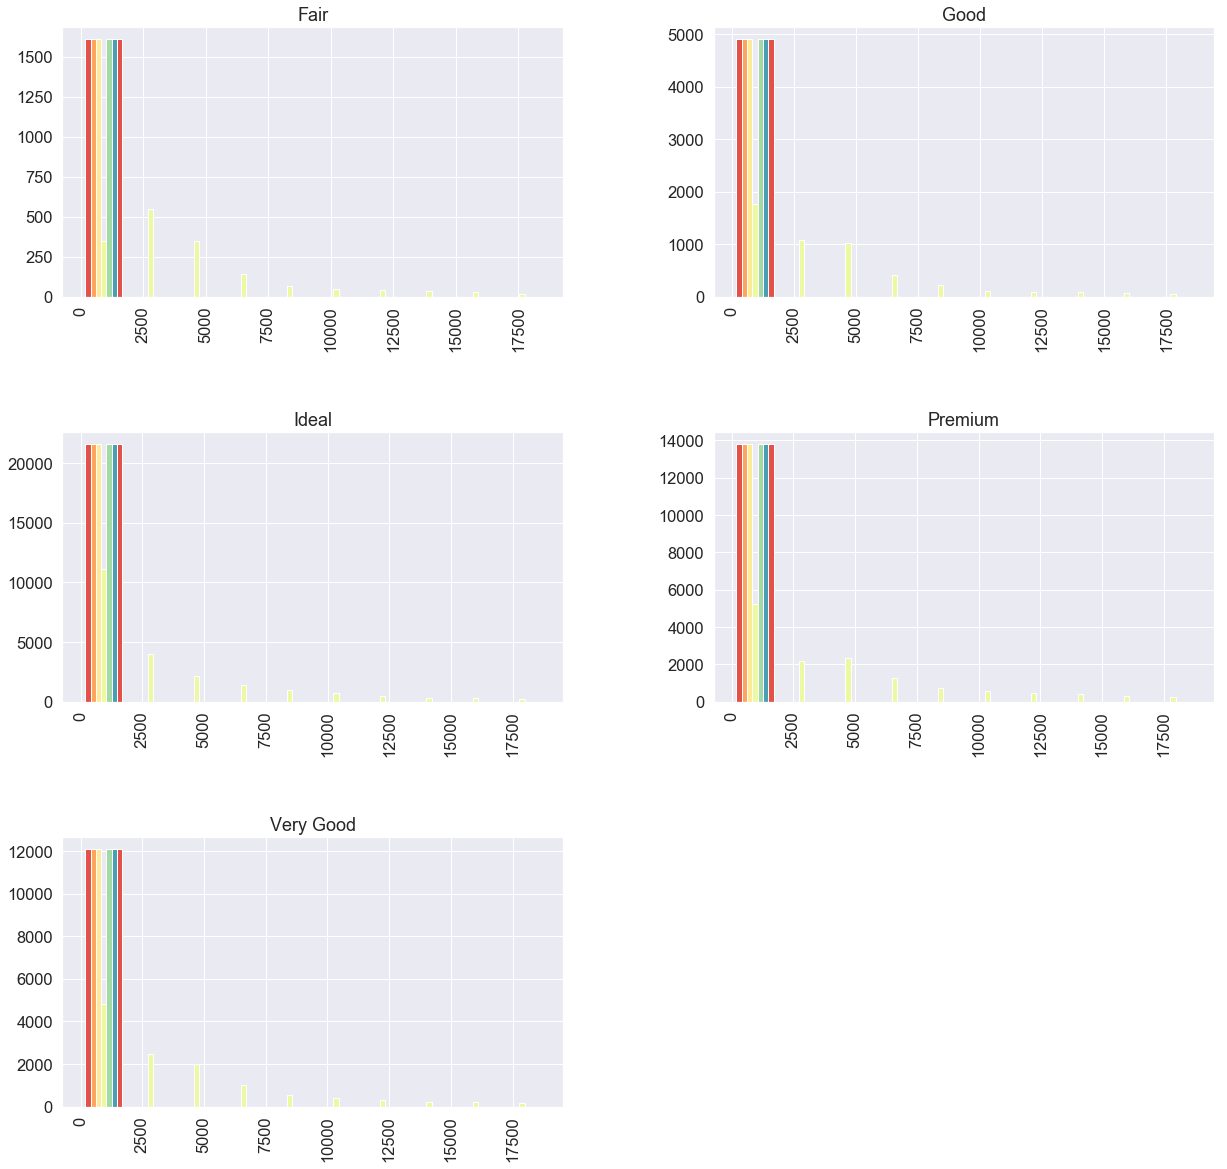

In [23]:
p = diamond_data.hist(figsize = (20,20), by=diamond_data.cut,grid=True)

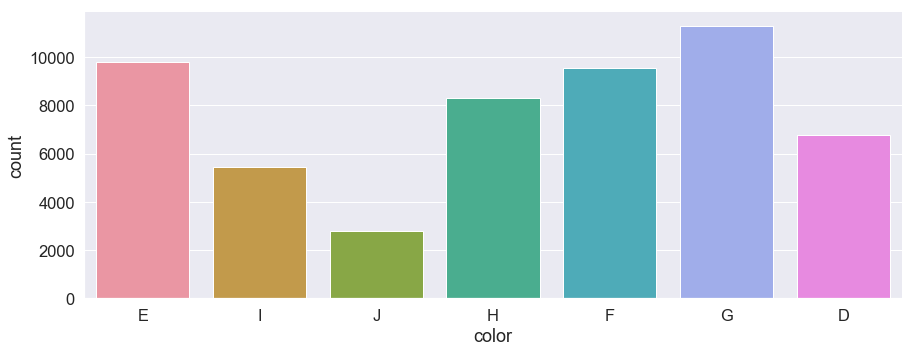

In [24]:
p = sns.factorplot(x='color', data=diamond_data, kind='count',aspect=2.5)

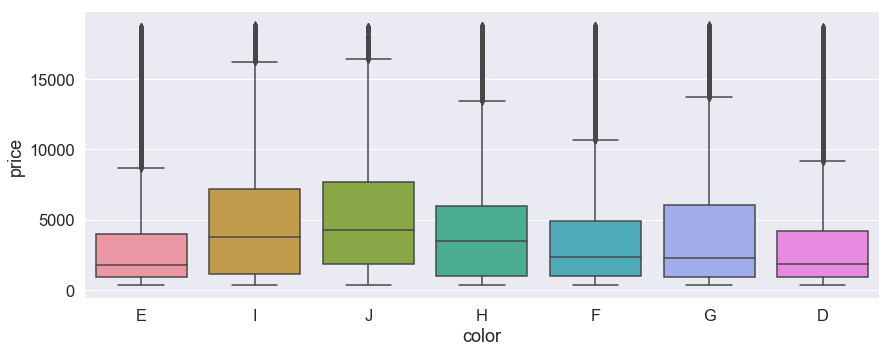

In [25]:
p = sns.factorplot(x='color', y='price', data=diamond_data, kind='box', aspect=2.5)

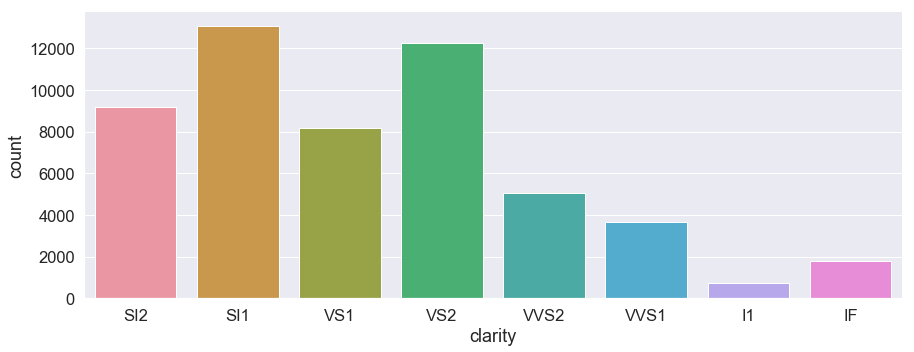

In [26]:
p = sns.factorplot(x='clarity', data=diamond_data, kind='count', aspect=2.5)

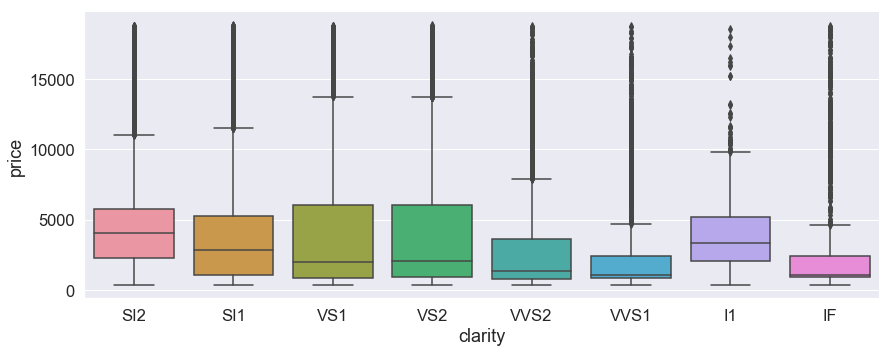

In [28]:
p = sns.factorplot(x='clarity', y='price', data=diamond_data, kind='box', aspect=2.5)

In [29]:
one_hot_encoders_diamond_data = pd.get_dummies(diamond_data)
one_hot_encoders_diamond_data.head()

carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0         0   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0         0   
2   0.23   56.9   65.0    327  4.05  4.07  2.31         0         1   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         0         0   
4   0.31   63.3   58.0    335  4.34  4.35  2.75         0         1   

   cut_Ideal  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0          1  ...        0        0           0           0            0   
1          0  ...        0        0           0           0            1   
2          0  ...        0        0           0           0            0   
3          0  ...        1        0           0           0            0   
4          0  ...        0        1           0           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            1            0            0             0             0  
1            0            0            0             0             0  
2            0            1            0             0             0  
3            0            0            1             0             0  
4            1            0            0             0             0  

[5 rows x 27 columns]

In [30]:
cols = one_hot_encoders_diamond_data.columns
diamond_clean_data = pd.DataFrame(one_hot_encoders_diamond_data,columns=cols)
diamond_clean_data.head()

carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0         0   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0         0   
2   0.23   56.9   65.0    327  4.05  4.07  2.31         0         1   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         0         0   
4   0.31   63.3   58.0    335  4.34  4.35  2.75         0         1   

   cut_Ideal  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0          1  ...        0        0           0           0            0   
1          0  ...        0        0           0           0            1   
2          0  ...        0        0           0           0            0   
3          0  ...        1        0           0           0            0   
4          0  ...        0        1           0           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            1            0            0             0             0  
1            0            0            0             0             0  
2            0            1            0             0             0  
3            0            0            1             0             0  
4            1            0            0             0             0  

[5 rows x 27 columns]


Data Scaling


In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals = pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['carat','depth','x','y','z','table']]),columns=['carat','depth','x','y','z','table'],index=diamond_clean_data.index)

In [35]:
numericals.head()

carat     depth         x         y         z     table
0 -1.198204 -0.174203 -1.591573 -1.539219 -1.580084 -1.099725
1 -1.240417 -1.361090 -1.645173 -1.662014 -1.750896  1.585988
2 -1.198204 -3.385781 -1.502241 -1.460280 -1.750896  3.376463
3 -1.071566  0.454149 -1.368242 -1.319943 -1.295396  0.243131
4 -1.029353  1.082501 -1.243176 -1.214690 -1.124583  0.243131

In [37]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['carat','depth','x','y','z','table']] = numericals[['carat', 'depth','x','y','z','table']]

In [38]:
diamond_clean_data_standard.head()

carat     depth     table  price         x         y         z  \
0 -1.198204 -0.174203 -1.099725    326 -1.591573 -1.539219 -1.580084   
1 -1.240417 -1.361090  1.585988    326 -1.645173 -1.662014 -1.750896   
2 -1.198204 -3.385781  3.376463    327 -1.502241 -1.460280 -1.750896   
3 -1.071566  0.454149  0.243131    334 -1.368242 -1.319943 -1.295396   
4 -1.029353  1.082501  0.243131    335 -1.243176 -1.214690 -1.124583   

   cut_Fair  cut_Good  cut_Ideal  ...  color_I  color_J  clarity_I1  \
0         0         0          1  ...        0        0           0   
1         0         0          0  ...        0        0           0   
2         0         1          0  ...        0        0           0   
3         0         0          0  ...        1        0           0   
4         0         1          0  ...        0        1           0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0           0            0            1            0            0   
1           0            1            0            0            0   
2           0            0            0            1            0   
3           0            0            0            0            1   
4           0            0            1            0            0   

   clarity_VVS1  clarity_VVS2  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 27 columns]

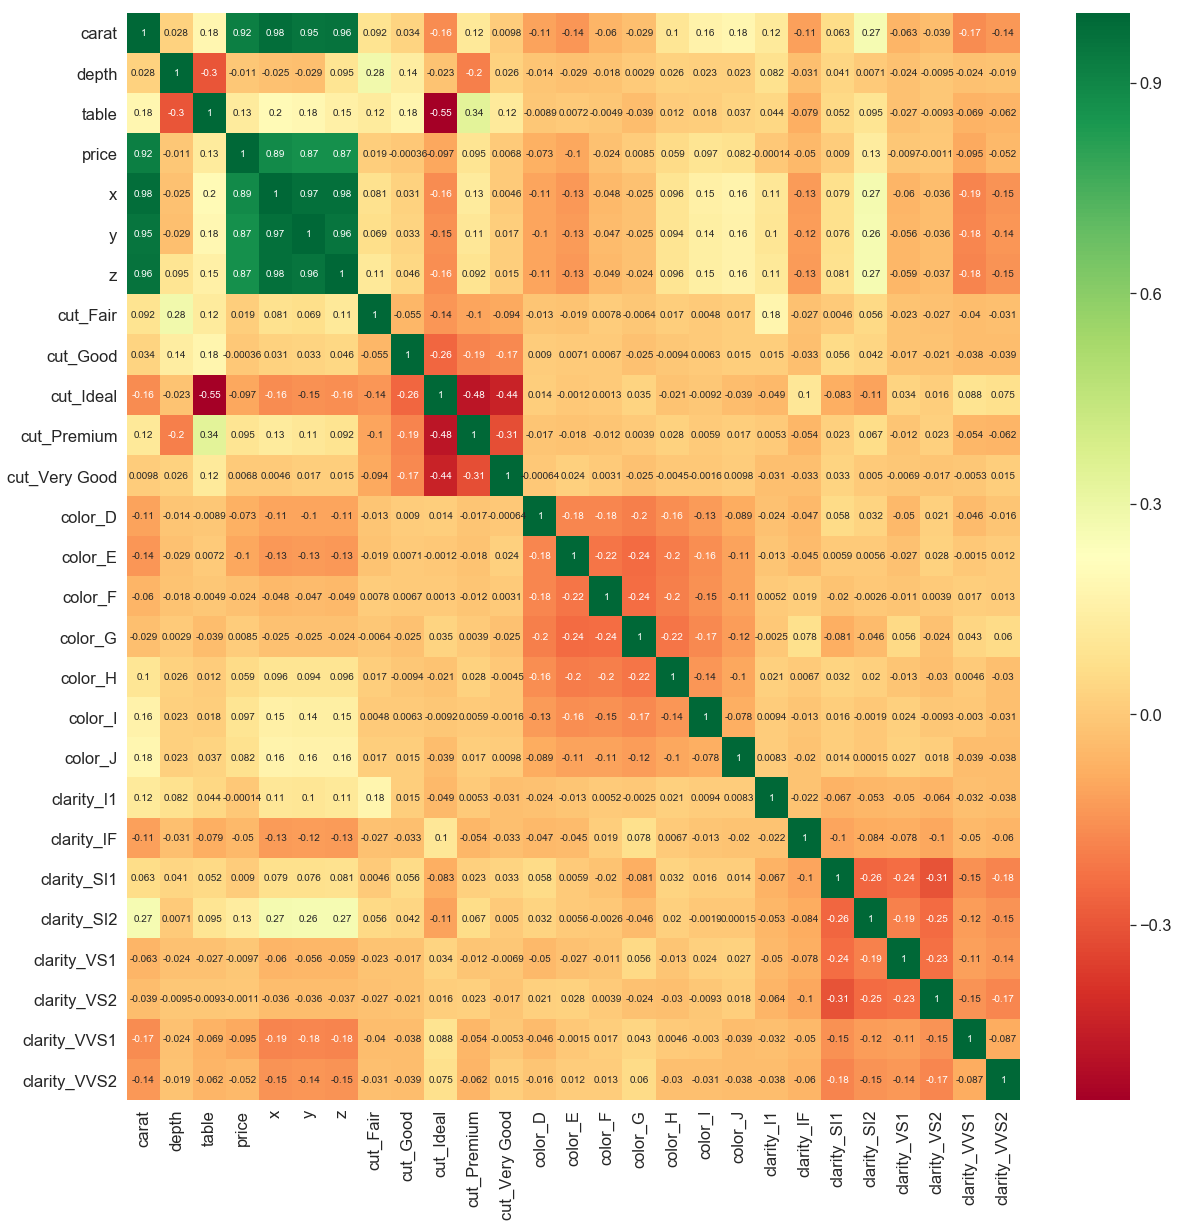

In [39]:
plt.figure(figsize=(20,20))
p=sns.heatmap(diamond_clean_data.corr(), annot=True,cmap='RdYlGn')

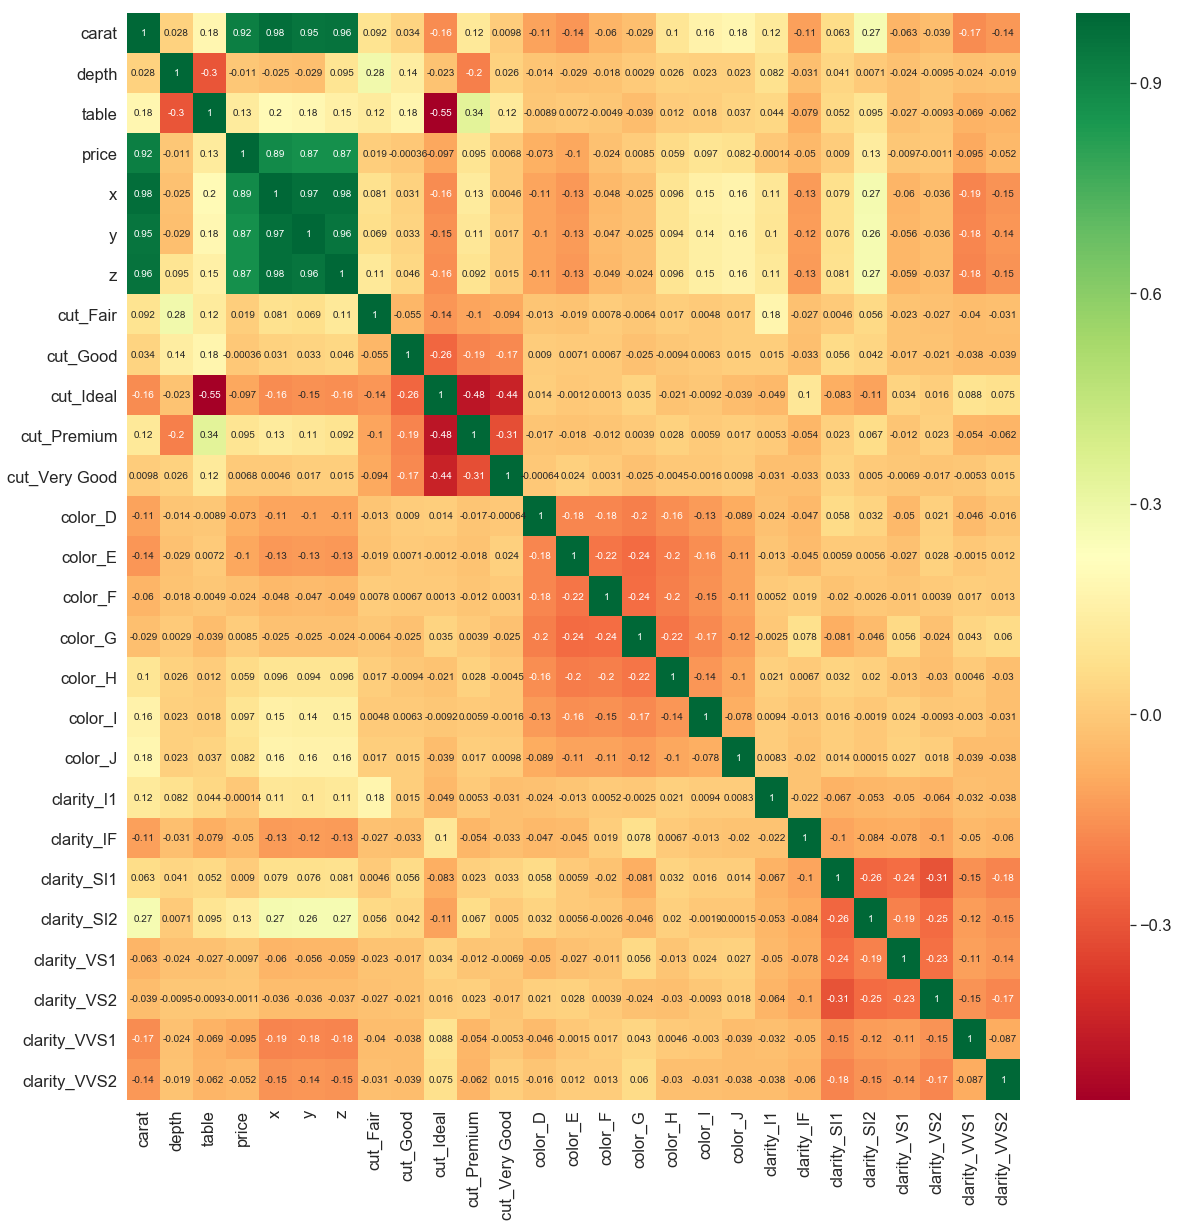

In [40]:
plt.figure(figsize=(20,20))
p=sns.heatmap(diamond_clean_data_standard.corr(), annot=True,cmap='RdYlGn')

In [41]:
x = diamond_clean_data_standard.drop(["price"],axis=1)
y = diamond_clean_data_standard.price

In [42]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)


Linear Regression



In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y, y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n-1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21078518476793%
Mean absolute error: 731.4415989248854
Mean squared error: 1222201.224070932
R Squared: 0.9221078518476793
Adjusted R Squared: 0.9219872757669482



 Lasso Regression Implementation
    

In [48]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))


accuracy: 92.20342856834277%
Mean absolute error: 729.9153209546201
Mean squared error: 1223355.5465300158
R Squared: 0.9220342856834277
Adjusted R Squared: 0.9219135957231853



Ridge Regression Implementation


In [50]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21059025809676%
Mean absolute error: 731.4437670796422
Mean squared error: 1222231.809902978
R Squared: 0.9221059025809676
Adjusted R Squared: 0.9219853234827957



Stats Model


In [52]:
l = list(range(0,len(diamond_clean_data_standard.columns)))

In [54]:
import statsmodels.formula.api as smf
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0],1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, 1]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price,exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 4.079e+04
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:05:08   Log-Likelihood:            -5.2667e+05
No. Observations:               53920   AIC:                         1.053e+06
Df Residuals:                   53919   BIC:                         1.053e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3674.6119     18.194    201.970      0.000    3638.952    3710.272
==============================================================================
Omnibus:                    14019.600   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153145.063
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.040   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
l.pop(5)
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0],1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, 1]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price,exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 4.079e+04
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:08:35   Log-Likelihood:            -5.2667e+05
No. Observations:               53920   AIC:                         1.053e+06
Df Residuals:                   53919   BIC:                         1.053e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3674.6119     18.194    201.970      0.000    3638.952    3710.272
==============================================================================
Omnibus:                    14019.600   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153145.063
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.040   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
l.pop(5)
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0],1)).astype(int), values = diamond_clean_data_standard.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, 1]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.price,exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 4.079e+04
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:11:17   Log-Likelihood:            -5.2667e+05
No. Observations:               53920   AIC:                         1.053e+06
Df Residuals:                   53919   BIC:                         1.053e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3674.6119     18.194    201.970      0.000    3638.952    3710.272
==============================================================================
Omnibus:                    14019.600   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153145.063
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.040   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""